In [2]:
# installing 1.0.3 because this version of pandas supports write to s3
!pip install pandas==1.0.3

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## Upgrades

In [3]:
# This path will be active after the launch of the hackathon
teamname = '9417-brhuang-unsw'
data_folder='s3://tf-trachack-data/212/'
# change root_folder to your team's root folder
# s3://tf-trachack-notebooks/<this should be replaced by team name as provided in EMAIL>/jupyter/jovyan/
root_folder='s3://tf-trachack-notebooks/'+'9417-brhuang-unsw'+'/jupyter/jovyan/'

In [4]:
import pandas as pd
upgrades=pd.read_csv(data_folder+"data/dev/upgrades.csv")
upgrades.head(2)

,line_id,date_observed,upgrade
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes


In [4]:
len(upgrades)

55868

In [5]:
upgrades['line_id'].nunique()

55868

The goal of the challenge is to predict upgrade. These examples have labels from historical data.

In [6]:
upgrades['upgrade'].value_counts()

no     40694
yes    15174
Name: upgrade, dtype: int64

## Network Usage Domestic

In [5]:
network_usage_domestic=pd.read_csv(data_folder+"data/dev/network_usage_domestic.csv")
network_usage_domestic.head(2)

,line_id,date,hotspot_kb,kb_5g,mms_in,mms_out,sms_in,sms_out,total_kb,voice_count_in,voice_count_total,voice_min_in,voice_min_out
0,24daa57d-c261-444c-afd4-c107a53d638e,2021-02-04,0.000000,0.0,0,0,10,7,7.533189e+05,5,8,7,4
1,8ba9b32c-3df3-4145-81ac-f334763a6f43,2021-02-13,166455.194336,0.0,0,0,6,9,2.750695e+06,0,2,0,3


In [11]:
len(network_usage_domestic)

6381966

In [137]:
##55868 750 people never used the network
network_usage_domestic['line_id'].nunique()

55118

In [67]:
#Take care of Nulls
#Drop unnecessary columns
#Feature Engineer
#Scale numerical if necessary
#mms = multimedia message
#plot date vs frequency

#create var
#count_call_out
#total voice

In [5]:
#no nan
network_usage_domestic[network_usage_domestic.isnull().any(axis=1)]

,line_id,date,hotspot_kb,kb_5g,mms_in,mms_out,sms_in,sms_out,total_kb,voice_count_in,voice_count_total,voice_min_in,voice_min_out


In [69]:
network_usage_domestic['hotspot_kb'].describe()

count    6.381966e+06
mean     1.548585e+04
std      2.580832e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.107637e+07
Name: hotspot_kb, dtype: float64

In [70]:
network_usage_domestic['kb_5g'].describe()

count    6.381966e+06
mean     8.359111e+01
std      1.751076e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.134862e+07
Name: kb_5g, dtype: float64

In [71]:
network_usage_domestic['date'].max()
network_usage_domestic['date'].min()
network_usage_domestic['date'].describe()

count        6381966
unique           184
top       2021-02-27
freq           47842
Name: date, dtype: object

In [72]:
network_usage_domestic['mms_in'].describe()

count    6.381966e+06
mean     9.337289e-01
std      5.759182e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.450000e+02
Name: mms_in, dtype: float64

In [73]:
network_usage_domestic['mms_out'].describe()

count    6.381966e+06
mean     8.848563e-01
std      1.086619e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.296000e+03
Name: mms_out, dtype: float64

In [74]:
network_usage_domestic['sms_in'].describe()

count    6.381966e+06
mean     8.445365e+00
std      1.988291e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      8.000000e+00
max      7.220000e+03
Name: sms_in, dtype: float64

In [75]:
network_usage_domestic['sms_out'].describe()

count    6.381966e+06
mean     7.114079e+00
std      1.953407e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      6.000000e+00
max      1.946000e+03
Name: sms_out, dtype: float64

In [76]:
network_usage_domestic['total_kb'].describe()

count    6.381966e+06
mean     4.338175e+05
std      9.930464e+05
min      0.000000e+00
25%      3.123142e+03
50%      8.081936e+04
75%      4.410322e+05
max      1.453400e+08
Name: total_kb, dtype: float64

In [77]:
network_usage_domestic['voice_count_in'].describe()

count    6.381966e+06
mean     2.112159e+00
std      3.604793e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.310000e+02
Name: voice_count_in, dtype: float64

In [78]:
network_usage_domestic['voice_count_total'].describe()

count    6.381966e+06
mean     5.859742e+00
std      9.461043e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      7.000000e+00
max      1.260000e+03
Name: voice_count_total, dtype: float64

In [79]:
network_usage_domestic['voice_min_in'].describe()

count    6.381966e+06
mean     1.161260e+01
std      3.669051e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      9.000000e+00
max      2.583000e+03
Name: voice_min_in, dtype: float64

In [80]:
network_usage_domestic['voice_min_out'].describe()

count    6.381966e+06
mean     1.457503e+01
std      4.198206e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      1.300000e+01
max      9.183000e+03
Name: voice_min_out, dtype: float64

In [81]:
network_usage_domestic.sort_values(by=['line_id'])

,line_id,date,hotspot_kb,kb_5g,mms_in,mms_out,sms_in,sms_out,total_kb,voice_count_in,voice_count_total,voice_min_in,voice_min_out
6315451,000027f8-7b65-407a-a90e-619e16f7cd60,2020-12-04,0.0,0.0,0,0,3,2,1.571288e+04,4,23,14,37
1545045,000027f8-7b65-407a-a90e-619e16f7cd60,2021-02-16,0.0,0.0,1,2,5,3,1.648305e+03,7,52,94,109
4076181,000027f8-7b65-407a-a90e-619e16f7cd60,2021-02-18,0.0,0.0,0,0,2,2,5.358496e+01,3,13,3,23
4076973,000027f8-7b65-407a-a90e-619e16f7cd60,2021-01-22,0.0,0.0,0,0,0,2,8.754013e+05,1,11,1,14
5590416,000027f8-7b65-407a-a90e-619e16f7cd60,2021-02-20,0.0,0.0,13,1,4,2,1.588432e+06,1,10,1,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6111583,ffffad0a-7a92-43dd-b296-e9f4218630d8,2021-03-07,0.0,0.0,0,0,4,0,5.360000e+02,0,0,0,0
4812916,ffffad0a-7a92-43dd-b296-e9f4218630d8,2020-09-16,0.0,0.0,0,0,1,0,6.010000e+02,1,8,3,12
6111582,ffffad0a-7a92-43dd-b296-e9f4218630d8,2021-02-05,0.0,0.0,0,0,3,1,2.490400e+04,0,3,0,9
799728,ffffad0a-7a92-43dd-b296-e9f4218630d8,2020-10-30,0.0,0.0,0,0,10,3,4.373000e+03,0,0,0,0


In [6]:
last_date = network_usage_domestic[['line_id','date']].groupby(['line_id']).max()
first_date = network_usage_domestic[['line_id','date']].groupby(['line_id']).min()
##last_date and date_observed differ by a few days

In [7]:
network_mean = network_usage_domestic.groupby(['line_id']).mean()

In [8]:
network_mean['voice_min_total'] = network_mean.apply(lambda row: row.voice_min_in + row.voice_min_out, axis=1)
network_mean['mms_total'] = network_mean.apply(lambda row: row.mms_in + row.mms_out, axis=1)
network_mean['sms_total'] = network_mean.apply(lambda row: row.sms_in + row.sms_out, axis=1)
network_mean['voice_count_out'] = network_mean.apply(lambda row: row.voice_count_total - row.voice_count_in, axis=1)

In [9]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [10]:
network_mean = network_mean.merge(upgrades, left_on='line_id', right_on='line_id')
network_mean = network_mean.merge(first_date, left_on='line_id', right_on='line_id')
network_mean = network_mean.merge(last_date, left_on='line_id', right_on='line_id')

In [11]:
encoder = LabelEncoder()
network_mean['upgrade'] = encoder.fit_transform(network_mean['upgrade'])
network_mean

,line_id,hotspot_kb,kb_5g,mms_in,mms_out,sms_in,sms_out,total_kb,voice_count_in,voice_count_total,voice_min_in,voice_min_out,voice_min_total,mms_total,sms_total,voice_count_out,date_observed,upgrade,date_x,date_y
0,000027f8-7b65-407a-a90e-619e16f7cd60,0.0,0.0,0.479592,0.204082,4.040816,3.214286,296366.681212,3.204082,20.214286,20.193878,46.663265,66.857143,0.683673,7.255102,17.010204,2021-03-11,0,2020-12-01,2021-03-08
1,0000871b-a418-424b-b6f6-79cfc4db0a12,0.0,0.0,0.069444,0.000000,1.777778,1.263889,50172.835829,0.513889,1.222222,1.055556,2.944444,4.000000,0.069444,3.041667,0.708333,2021-03-11,0,2020-09-12,2021-03-10
2,00022391-6d4e-41bb-a0ca-2af25cec301d,0.0,0.0,0.201835,0.293578,2.788991,3.431193,100985.151654,0.440367,3.036697,0.889908,3.972477,4.862385,0.495413,6.220183,2.596330,2021-03-14,0,2020-09-15,2021-03-11
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,0.0,0.0,0.564103,0.282051,15.923077,10.487179,124198.959961,1.448718,2.897436,3.089744,2.910256,6.000000,0.846154,26.410256,1.448718,2021-03-11,0,2020-12-23,2021-03-10
4,00044afe-35a4-4313-92ec-36618c83fb23,0.0,0.0,0.353293,0.041916,3.425150,2.329341,149104.967440,1.580838,3.131737,2.922156,3.754491,6.676647,0.395210,5.754491,1.550898,2021-03-11,0,2020-09-12,2021-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55113,fffc0209-3cec-4a77-be13-2fff03ede88a,0.0,0.0,0.000000,0.043478,0.173913,0.000000,83672.802027,0.057971,0.115942,0.086957,0.115942,0.202899,0.043478,0.173913,0.057971,2021-03-14,0,2020-12-28,2021-03-13
55114,fffc2f64-85b9-4115-b782-52dbe497fdf6,0.0,0.0,0.166667,0.287879,0.969697,0.560606,211500.136112,0.257576,1.757576,0.590909,3.833333,4.424242,0.454545,1.530303,1.500000,2021-03-11,0,2020-12-24,2021-03-10
55115,fffee791-298d-4a18-975b-ac3f64938790,0.0,0.0,0.150000,0.250000,12.805556,14.377778,865735.257395,1.627778,3.822222,3.172222,3.677778,6.850000,0.400000,27.183333,2.194444,2021-03-13,1,2020-09-14,2021-03-12
55116,fffefbba-00b7-42b7-9125-4b86497e0b4f,0.0,0.0,0.039106,0.167598,2.932961,2.379888,239726.525140,0.307263,0.977654,1.279330,1.860335,3.139665,0.206704,5.312849,0.670391,2021-03-14,1,2020-09-15,2021-03-13


In [14]:
from datetime import datetime
now = datetime.now()

network_mean['length_of_connection'] = now - pd.to_datetime(network_mean['date_x'], format='%Y-%m-%d')
network_mean['length_of_connection'] = network_mean['length_of_connection'].apply(lambda x: x.days)





In [18]:
network_mean

,line_id,hotspot_kb,kb_5g,mms_in,mms_out,sms_in,sms_out,total_kb,voice_count_in,voice_count_total,...,voice_min_out,voice_min_total,mms_total,sms_total,voice_count_out,date_observed,upgrade,date_x,date_y,length_of_connection
0,000027f8-7b65-407a-a90e-619e16f7cd60,0.0,0.0,0.479592,0.204082,4.040816,3.214286,296366.681212,3.204082,20.214286,...,46.663265,66.857143,0.683673,7.255102,17.010204,2021-03-11,no,2020-12-01,2021-03-08,146
1,0000871b-a418-424b-b6f6-79cfc4db0a12,0.0,0.0,0.069444,0.000000,1.777778,1.263889,50172.835829,0.513889,1.222222,...,2.944444,4.000000,0.069444,3.041667,0.708333,2021-03-11,no,2020-09-12,2021-03-10,226
2,00022391-6d4e-41bb-a0ca-2af25cec301d,0.0,0.0,0.201835,0.293578,2.788991,3.431193,100985.151654,0.440367,3.036697,...,3.972477,4.862385,0.495413,6.220183,2.596330,2021-03-14,no,2020-09-15,2021-03-11,223
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,0.0,0.0,0.564103,0.282051,15.923077,10.487179,124198.959961,1.448718,2.897436,...,2.910256,6.000000,0.846154,26.410256,1.448718,2021-03-11,no,2020-12-23,2021-03-10,124
4,00044afe-35a4-4313-92ec-36618c83fb23,0.0,0.0,0.353293,0.041916,3.425150,2.329341,149104.967440,1.580838,3.131737,...,3.754491,6.676647,0.395210,5.754491,1.550898,2021-03-11,no,2020-09-12,2021-03-10,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55113,fffc0209-3cec-4a77-be13-2fff03ede88a,0.0,0.0,0.000000,0.043478,0.173913,0.000000,83672.802027,0.057971,0.115942,...,0.115942,0.202899,0.043478,0.173913,0.057971,2021-03-14,no,2020-12-28,2021-03-13,119
55114,fffc2f64-85b9-4115-b782-52dbe497fdf6,0.0,0.0,0.166667,0.287879,0.969697,0.560606,211500.136112,0.257576,1.757576,...,3.833333,4.424242,0.454545,1.530303,1.500000,2021-03-11,no,2020-12-24,2021-03-10,123
55115,fffee791-298d-4a18-975b-ac3f64938790,0.0,0.0,0.150000,0.250000,12.805556,14.377778,865735.257395,1.627778,3.822222,...,3.677778,6.850000,0.400000,27.183333,2.194444,2021-03-13,yes,2020-09-14,2021-03-12,224
55116,fffefbba-00b7-42b7-9125-4b86497e0b4f,0.0,0.0,0.039106,0.167598,2.932961,2.379888,239726.525140,0.307263,0.977654,...,1.860335,3.139665,0.206704,5.312849,0.670391,2021-03-14,yes,2020-09-15,2021-03-13,223


<AxesSubplot:>

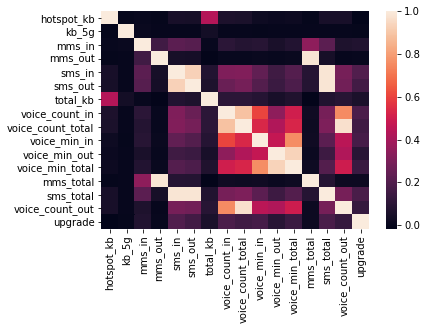

In [135]:
mean = network_mean.corr()
sns.heatmap(mean)

<AxesSubplot:>

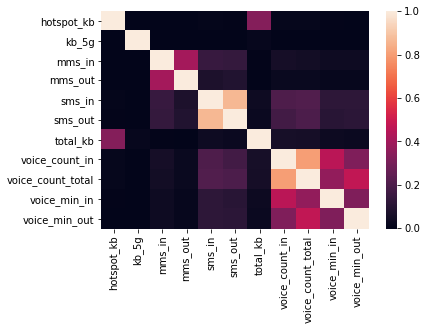

In [87]:
##less correlation in original data set as most values are 0, so will focus on the mean of the data
original = network_usage_domestic.corr()
sns.heatmap(original)

<AxesSubplot:>

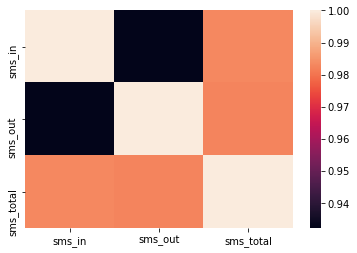

In [88]:
subset = network_mean[['sms_in', 'sms_out', 'sms_total']]
s = subset.corr()
sns.heatmap(s)

<AxesSubplot:>

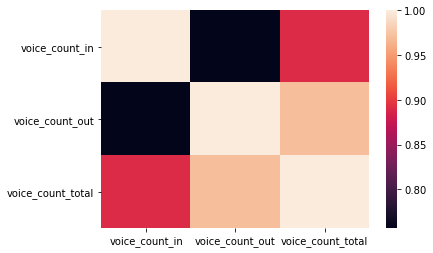

In [89]:
subset = network_mean[['voice_count_in', 'voice_count_out', 'voice_count_total']]
s = subset.corr()
sns.heatmap(s)

<AxesSubplot:>

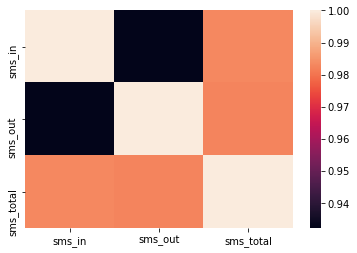

In [90]:
subset = network_mean[['sms_in', 'sms_out', 'sms_total']]
s = subset.corr()
sns.heatmap(s)

<AxesSubplot:>

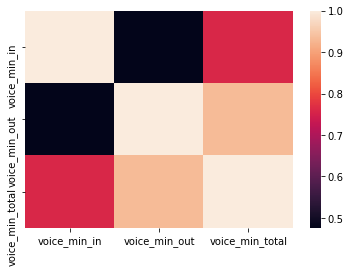

In [91]:
subset = network_mean[['voice_min_in', 'voice_min_out', 'voice_min_total']]
s = subset.corr()
sns.heatmap(s)

<AxesSubplot:>

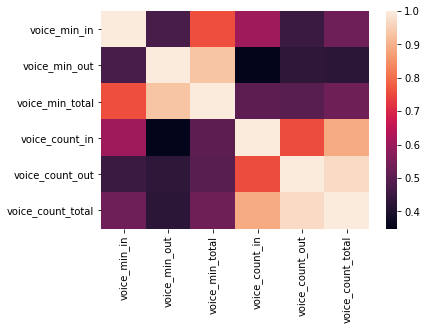

In [92]:
subset = network_mean[['voice_min_in', 'voice_min_out', 'voice_min_total','voice_count_in', 'voice_count_out', 'voice_count_total']]
s = subset.corr()
sns.heatmap(s)

In [ ]:
subset = network_mean[['voice_min_in','voice_count_in']]
s = subset.corr()
sns.heatmap(s)

<AxesSubplot:>

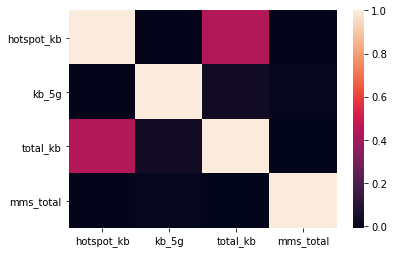

In [145]:
##hotspot_kb not that correlated with total_kb
subset = network_mean[['hotspot_kb',
 'kb_5g','total_kb','mms_total']]
s = subset.corr()
sns.heatmap(s)

In [93]:
list(network_mean)

['line_id',
 'hotspot_kb',
 'kb_5g',
 'mms_in',
 'mms_out',
 'sms_in',
 'sms_out',
 'total_kb',
 'voice_count_in',
 'voice_count_total',
 'voice_min_in',
 'voice_min_out',
 'voice_min_total',
 'mms_total',
 'sms_total',
 'voice_count_out',
 'date_observed',
 'upgrade',
 'date_x',
 'date_y',
 'length_of_connection']

In [15]:
final_network = network_mean[['line_id',
 'hotspot_kb',
 'total_kb',
 'voice_count_total',
 'voice_min_total',
 'mms_total',
 'sms_total',
 'length_of_connection',                             
 'upgrade']]

<AxesSubplot:>

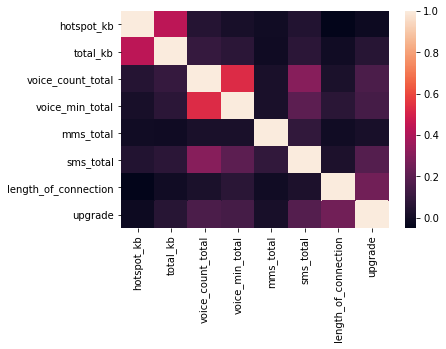

In [98]:
s = final_network.corr()
sns.heatmap(s)

In [20]:
final_network.rename(columns={"date_x": "first_date"}, inplace='TRUE')



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
final_network

,line_id,hotspot_kb,total_kb,voice_count_total,voice_min_total,mms_total,sms_total,length_of_connection,upgrade
0,000027f8-7b65-407a-a90e-619e16f7cd60,0.0,296366.681212,20.214286,66.857143,0.683673,7.255102,147,0
1,0000871b-a418-424b-b6f6-79cfc4db0a12,0.0,50172.835829,1.222222,4.000000,0.069444,3.041667,227,0
2,00022391-6d4e-41bb-a0ca-2af25cec301d,0.0,100985.151654,3.036697,4.862385,0.495413,6.220183,224,0
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,0.0,124198.959961,2.897436,6.000000,0.846154,26.410256,125,0
4,00044afe-35a4-4313-92ec-36618c83fb23,0.0,149104.967440,3.131737,6.676647,0.395210,5.754491,227,0
...,...,...,...,...,...,...,...,...,...
55113,fffc0209-3cec-4a77-be13-2fff03ede88a,0.0,83672.802027,0.115942,0.202899,0.043478,0.173913,120,0
55114,fffc2f64-85b9-4115-b782-52dbe497fdf6,0.0,211500.136112,1.757576,4.424242,0.454545,1.530303,124,0
55115,fffee791-298d-4a18-975b-ac3f64938790,0.0,865735.257395,3.822222,6.850000,0.400000,27.183333,225,1
55116,fffefbba-00b7-42b7-9125-4b86497e0b4f,0.0,239726.525140,0.977654,3.139665,0.206704,5.312849,224,1


In [17]:
total = upgrades['line_id']
total = set(total)
net = final_network['line_id']
net = set(net)
left_out = total.difference(net)
len(left_out)




750

In [18]:
final_network['used_network'] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
not_connect = final_network

In [20]:
not_connect = not_connect[0:0]

In [21]:
left_out = list(left_out)
#type(left_out)

In [22]:
not_connect['line_id'] = left_out

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
not_connect = not_connect.fillna(0)

In [24]:
not_connect

,line_id,hotspot_kb,total_kb,voice_count_total,voice_min_total,mms_total,sms_total,length_of_connection,upgrade,used_network
0,d68ae44f-764f-40c1-9f1f-3c32af0c8d2b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9c02132c-40bd-4295-a47c-77c75da4fe22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,d3b45557-19ca-4d6c-8ec0-204a847af712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,755101ef-692c-4431-b34b-bb803fb3033a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01dc7fad-a6de-45d0-b710-4d6b54828aba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
745,16e0f170-641b-43d2-910d-5134a6623358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,a9d8bd8e-12b3-4fd9-b9d5-1039b1c57f48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,61086361-8a0b-40e5-a1a1-ce64fde5956c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,9b33efbb-3af9-426b-8c86-b4224cdeee18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
not_connect.drop(['upgrade'], axis=1, inplace = True)

In [26]:
not_connect = not_connect.merge(upgrades, left_on='line_id', right_on='line_id')

In [27]:
encoder = LabelEncoder()
not_connect['upgrade'] = encoder.fit_transform(not_connect['upgrade'])

In [28]:
pd.concat([final_network, not_connect])

,line_id,hotspot_kb,total_kb,voice_count_total,voice_min_total,mms_total,sms_total,length_of_connection,upgrade,used_network,date_observed
0,000027f8-7b65-407a-a90e-619e16f7cd60,0.0,296366.681212,20.214286,66.857143,0.683673,7.255102,147.0,0,1.0,NaN
1,0000871b-a418-424b-b6f6-79cfc4db0a12,0.0,50172.835829,1.222222,4.000000,0.069444,3.041667,227.0,0,1.0,NaN
2,00022391-6d4e-41bb-a0ca-2af25cec301d,0.0,100985.151654,3.036697,4.862385,0.495413,6.220183,224.0,0,1.0,NaN
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,0.0,124198.959961,2.897436,6.000000,0.846154,26.410256,125.0,0,1.0,NaN
4,00044afe-35a4-4313-92ec-36618c83fb23,0.0,149104.967440,3.131737,6.676647,0.395210,5.754491,227.0,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
745,16e0f170-641b-43d2-910d-5134a6623358,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0,2021-03-14
746,a9d8bd8e-12b3-4fd9-b9d5-1039b1c57f48,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0,2021-03-14
747,61086361-8a0b-40e5-a1a1-ce64fde5956c,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0,2021-03-14
748,9b33efbb-3af9-426b-8c86-b4224cdeee18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0,2021-03-10


In [29]:
final_network = pd.concat([final_network, not_connect])


In [30]:
final_network.drop(['date_observed'], axis=1, inplace = True)


In [119]:
final_network.to_csv(root_folder+"sample-notebook/final_network.csv", index=False)

In [31]:
final_network

,line_id,hotspot_kb,total_kb,voice_count_total,voice_min_total,mms_total,sms_total,length_of_connection,upgrade,used_network
0,000027f8-7b65-407a-a90e-619e16f7cd60,0.0,296366.681212,20.214286,66.857143,0.683673,7.255102,147.0,0,1.0
1,0000871b-a418-424b-b6f6-79cfc4db0a12,0.0,50172.835829,1.222222,4.000000,0.069444,3.041667,227.0,0,1.0
2,00022391-6d4e-41bb-a0ca-2af25cec301d,0.0,100985.151654,3.036697,4.862385,0.495413,6.220183,224.0,0,1.0
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,0.0,124198.959961,2.897436,6.000000,0.846154,26.410256,125.0,0,1.0
4,00044afe-35a4-4313-92ec-36618c83fb23,0.0,149104.967440,3.131737,6.676647,0.395210,5.754491,227.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
745,16e0f170-641b-43d2-910d-5134a6623358,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0
746,a9d8bd8e-12b3-4fd9-b9d5-1039b1c57f48,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0
747,61086361-8a0b-40e5-a1a1-ce64fde5956c,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0
748,9b33efbb-3af9-426b-8c86-b4224cdeee18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0


In [121]:
a=pd.read_csv(root_folder+"sample-notebook/final_network.csv")
a

,line_id,hotspot_kb,total_kb,voice_count_total,voice_min_total,mms_total,sms_total,length_of_connection,upgrade,used_network
0,000027f8-7b65-407a-a90e-619e16f7cd60,0.0,296366.681212,20.214286,66.857143,0.683673,7.255102,143.0,0,1.0
1,0000871b-a418-424b-b6f6-79cfc4db0a12,0.0,50172.835829,1.222222,4.000000,0.069444,3.041667,223.0,0,1.0
2,00022391-6d4e-41bb-a0ca-2af25cec301d,0.0,100985.151654,3.036697,4.862385,0.495413,6.220183,220.0,0,1.0
3,00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8,0.0,124198.959961,2.897436,6.000000,0.846154,26.410256,121.0,0,1.0
4,00044afe-35a4-4313-92ec-36618c83fb23,0.0,149104.967440,3.131737,6.676647,0.395210,5.754491,223.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
55863,5417b47a-8bf9-4f76-a4bb-61134b8a3acd,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
55864,fb009377-0329-4b15-9a30-bcbd72906c74,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
55865,d6cb2013-8d50-47c3-b232-ed10a637e2d5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
55866,9f5c73aa-9ad5-4e13-98e3-8817c1d87640,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0.0


<AxesSubplot:>

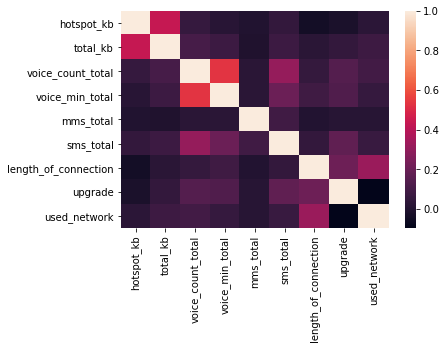

In [32]:
s = final_network.corr()
sns.heatmap(s)

In [94]:
line_id = network_usage_domestic['line_id']

In [95]:
count = line_id.value_counts()

In [96]:
count = count.to_frame()

In [97]:
a = network_usage_domestic.groupby(['line_id']).size()

In [98]:
a = a.sort_values()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='line_id'>

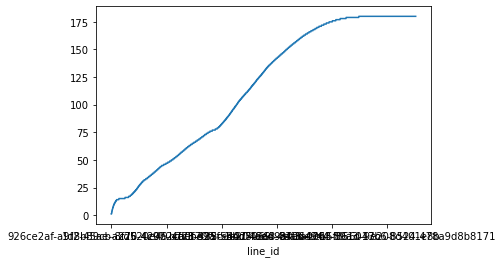

In [99]:
a.plot.line()

In [100]:
b = network_usage_domestic.groupby(['date']).size()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

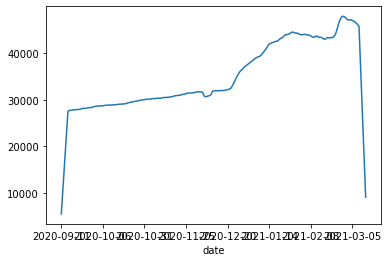

In [101]:
b.plot.line()

In [39]:
network_usage_domestic['voice_min_total'] = network_usage_domestic.apply(lambda row: row.voice_min_in + row.voice_min_out, axis=1)


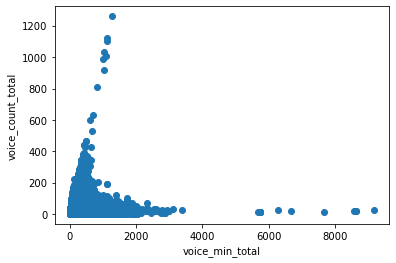

In [42]:
import matplotlib.pyplot as plt


plt.scatter(x=network_usage_domestic['voice_min_total'], y=network_usage_domestic['voice_count_total'])

plt.xlabel("voice_min_total")
plt.ylabel("voice_count_total")
plt.show()


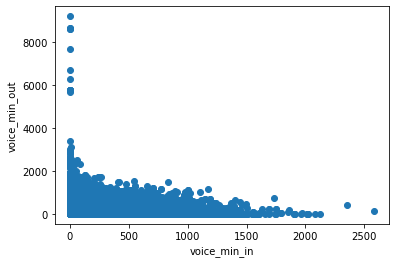

In [43]:
plt.scatter(x=network_usage_domestic['voice_min_in'], y=network_usage_domestic['voice_min_out'])
plt.xlabel("voice_min_in")
plt.ylabel("voice_min_out")
plt.show()
